In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance


In [10]:
df = pd.read_csv('preci_alt.csv')
df.columns = ['date','value']
df.date = pd.to_datetime(df.date,format='%b %d, %Y')
df['month'] = df.date.dt.month
df.head(3)

,date,value,month
0,2010-01-01,0.0,1
1,2010-01-02,0.0,1
2,2010-01-03,0.0,1


In [11]:
df2019 = df[(df.date.dt.year == 2019) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2018 = df[(df.date.dt.year == 2018) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2017 = df[(df.date.dt.year == 2017) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2016 = df[(df.date.dt.year == 2016) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2019.head(3)

,date,value,month
3438,2019-06-01,0.0,6
3439,2019-06-02,0.0,6
3440,2019-06-03,0.0,6


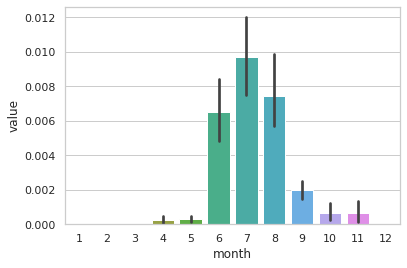

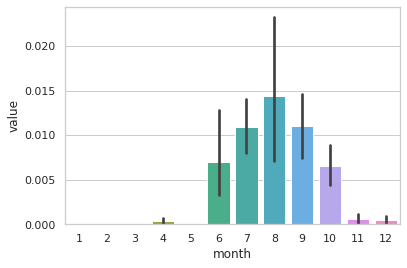

In [36]:
lis=[]
fig, ax = plt.subplots()  
df18 = df[df.date.dt.year == 2018]
sns.barplot(df18['month'],df18['value'])
plt.show()
df19 = df[df.date.dt.year == 2019]
sns.barplot(df19['month'],df19['value'])
fig.show()

In [73]:
df18m=df18.groupby('month').mean()
df19m=df19.groupby('month').mean()
df19m

,value
month,
1,0.000000
2,0.000000
3,0.000000
4,0.000367
5,0.000000
6,0.007033
7,0.010968
8,0.014387
9,0.011067


In [74]:
intersect=[]
union=[]
for i in range(0,12):    
    intersect.append(min(df19m.iloc[i][0],df18m.iloc[i][0]))
    union.append(max(df19m.iloc[i][0],df18m.iloc[i][0]))


In [79]:
jacc = np.array(intersect)/np.array(union)
jacc

array([       nan,        nan,        nan, 0.63636364, 0.        ,
       0.92890995, 0.88529412, 0.51569507, 0.17771084, 0.10344828,
       0.89473684, 0.        ])

In [83]:
a = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        intersect = min(df19m.iloc[i][0],df19m.iloc[j][0])
        union = max(df19m.iloc[i][0],df19m.iloc[j][0])
        a[i][j] = intersect/union

In [85]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.052133,0.033431,0.025486,0.033133,0.055993,0.647059,0.759524
4,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.052133,0.000000,1.000000,0.641275,0.488864,0.635542,0.931050,0.080569,0.068639
6,0.000000,0.000000,0.000000,0.033431,0.000000,0.641275,1.000000,0.762332,0.991061,0.597059,0.051667,0.044016
7,0.000000,0.000000,0.000000,0.025486,0.000000,0.488864,0.762332,1.000000,0.769208,0.455157,0.039387,0.033555
8,0.000000,0.000000,0.000000,0.033133,0.000000,0.635542,0.991061,0.769208,1.000000,0.591722,0.051205,0.043623
9,0.000000,0.000000,0.000000,0.055993,0.000000,0.931050,0.597059,0.455157,0.591722,1.000000,0.086535,0.073722


In [76]:
df19m

[0.0,
 0.0,
 0.0,
 0.0003666666666666667,
 0.0002903225806451613,
 0.007033333333333335,
 0.010967741935483872,
 0.014387096774193553,
 0.011066666666666669,
 0.006548387096774194,
 0.0006333333333333334,
 0.00048275862068965523]